#### 불용어 및 형태소 정의

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib.pylab as plt
from matplotlib import cm 
from matplotlib import font_manager, rc

colors = cm.get_cmap('Set2')(np.arange(5))
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)    

In [2]:
data_path = "C:\\Users\\gby1349\\python\\텍스트 분석\\"
data = pd.read_excel(data_path + '리뷰데이터.xlsx')

In [3]:
stop_korea_word = pd.read_csv('불용어사전.txt', header = None)
stop_korea_word.rename(columns = {0:"words"}, inplace = True)
stop_word_list = list(stop_korea_word.words)

In [4]:
from kiwipiepy import Kiwi
kiwi = Kiwi()                
kiwi.prepare()    

0

In [16]:
def extract_noun(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos.startswith('N'):
            yield token 

In [15]:
for token, pos, _, _ in result[0][0]:
    if pos[0] in'NY': 
        yield token 

SyntaxError: 'yield' outside function (<ipython-input-15-c12f1b828ea9>, line 3)

# 3. 단어 빈도

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(max_features=1000, stop_words=stop_word_list, tokenizer = token_analyze, min_df = 5, analyzer = 'word', ngram_range =[1,2])
word_frequency_tdm = cv.fit_transform(data['Review'])

tfid = TfidfTransformer()
word_frequency_tfid = tfid.fit_transform(word_frequency_tdm)

C:\Users\gby1349\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['공항', '나', '렌트', '렌트카', '명품', '스타', '차', '카', '패스'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [26]:
word_count = pd.DataFrame({'단어': cv.get_feature_names(), 
                           '빈도(TDM)': word_frequency_tdm.sum(axis = 0).flat,
                           '빈도(TF-IDF)': word_frequency_tfid.sum(axis = 0).flat})

word_count['단어'].replace('', np.nan, inplace=True)
word_count= word_count.dropna(how='any') 

In [27]:
word_count.sort_values(by ='빈도(TF-IDF)',ascending = False).head(20)

,단어,빈도(TDM),빈도(TF-IDF)
618,이용,4660,737.567717
878,친절,4034,634.357039
796,차량,4863,606.719276
757,차,4282,579.514785
56,공항,2164,380.137905
740,직원,2390,364.152815
204,렌터카,2752,361.077893
533,여행,1872,345.224773
381,상태,1592,290.895412
284,반납,2161,290.858632


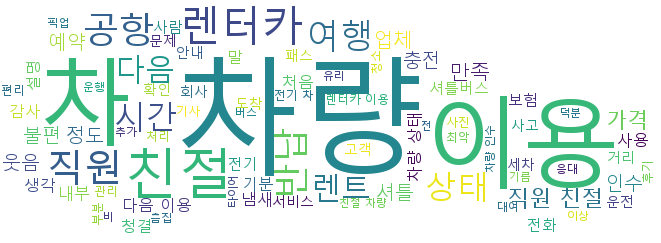

In [28]:
from wordcloud import WordCloud
from PIL import Image

dense_mask = np.array(Image.open("C:\\Users\\gby1349\\python\\텍스트 분석\\car.jpg"))
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', background_color='white', max_words=80, width=1000, height=1000, mask = dense_mask)

count_dic1 = dict(zip(word_count['단어'], word_count['빈도(TDM)']))
cloud = wc.fit_words(count_dic1)
cloud.to_image()

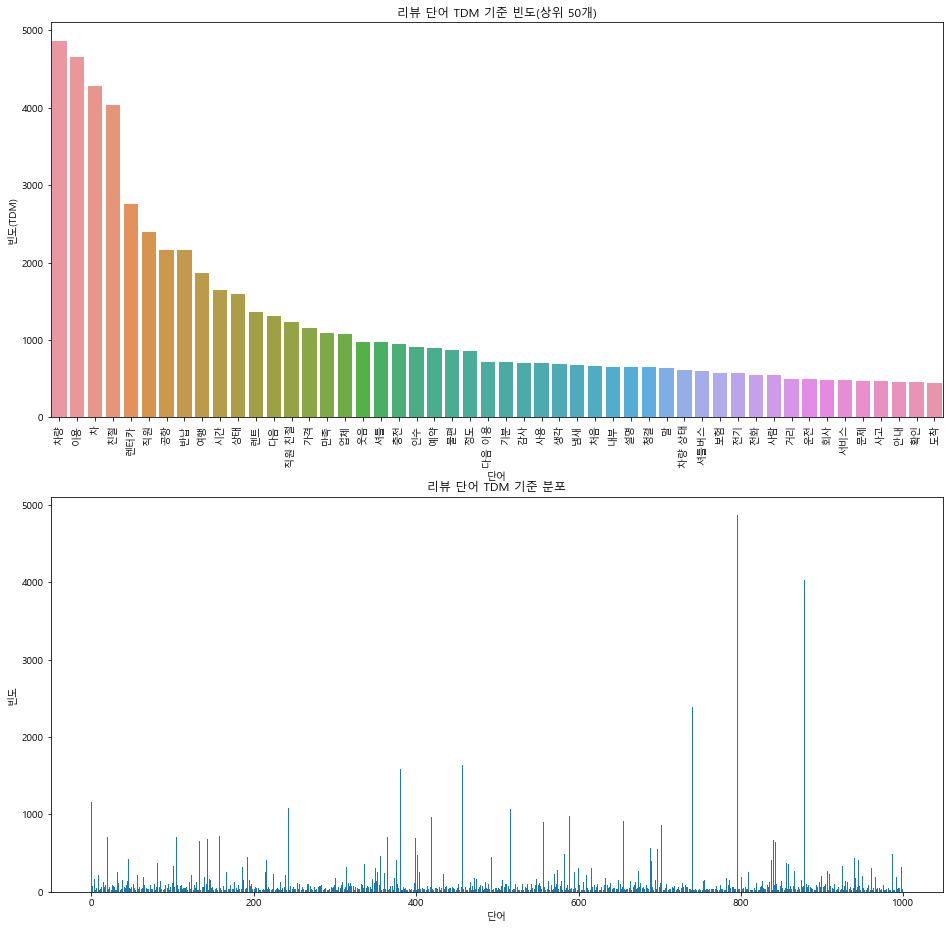

In [29]:
top_word_tdm = word_count.sort_values('빈도(TDM)', ascending=False)[:50]

fig, axes = plt.subplots(2,1, figsize = (16,16)) 
sns.barplot(x = list(top_word_tdm.단어), y = '빈도(TDM)', data = top_word_tdm, ax = axes[0])
axes[0].set_title('리뷰 단어 TDM 기준 빈도(상위 50개)')
axes[0].set_xlabel('단어')
axes[0].set_xticklabels(list(top_word_tdm.단어), rotation = 90)

count = word_frequency_tdm.toarray().sum(axis=0)
axes[1].bar(range(len(count)), count)
axes[1].set_title('리뷰 단어 TDM 기준 분포')
axes[1].set_xlabel('단어')
axes[1].set_ylabel('빈도')
plt.show()

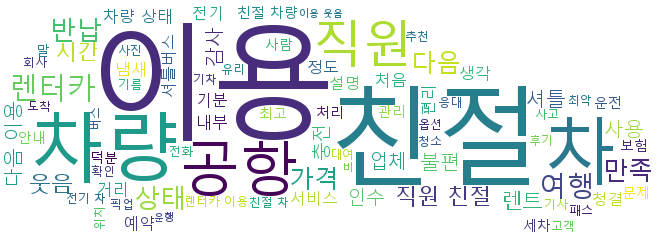

In [30]:
from wordcloud import WordCloud

dense_mask = np.array(Image.open("C:\\Users\\gby1349\\python\\텍스트 분석\\car.jpg"))
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', background_color='white', max_words=80, width=1000, height=1000, mask = dense_mask)

count_dic1 = dict(zip(word_count['단어'], word_count['빈도(TF-IDF)']))
cloud = wc.fit_words(count_dic1)
cloud.to_image()

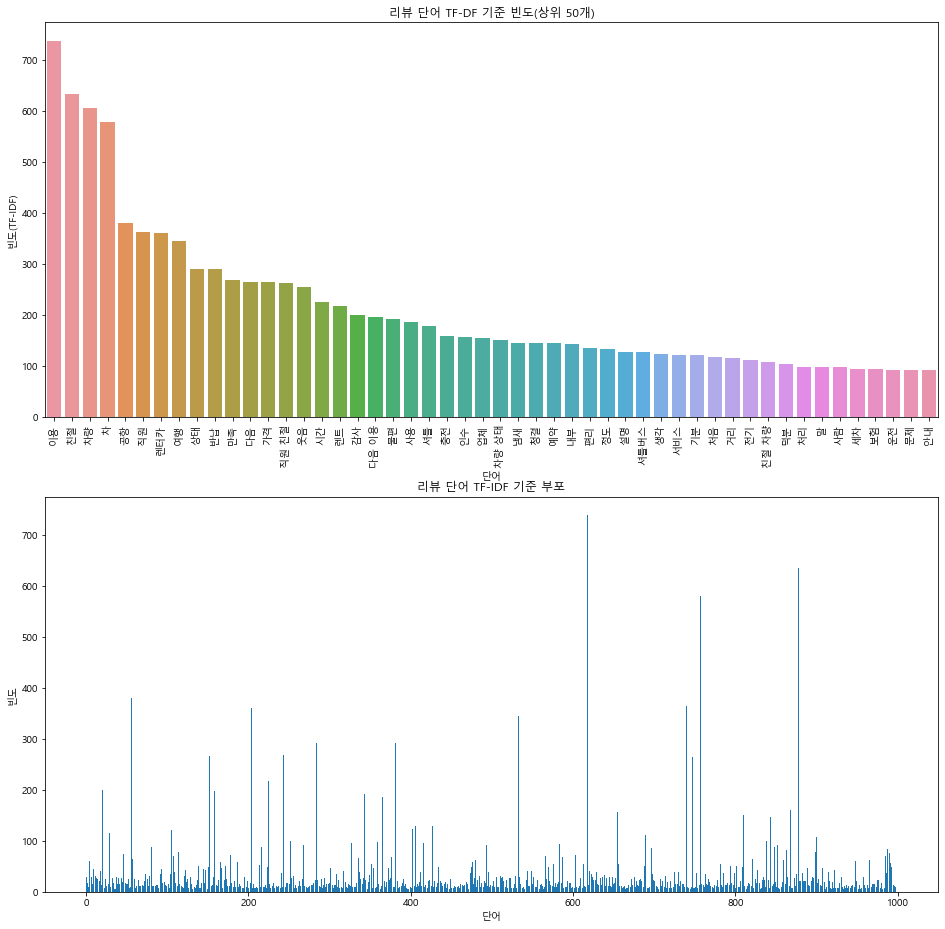

In [31]:
top_word_tf_idf = word_count.sort_values('빈도(TF-IDF)', ascending=False)[:50]

fig, axes = plt.subplots(2,1, figsize = (16,16)) 
sns.barplot(x = list(top_word_tf_idf.단어), y = '빈도(TF-IDF)', data = top_word_tf_idf , ax = axes[0])
axes[0].set_title('리뷰 단어 TF-DF 기준 빈도(상위 50개)')
axes[0].set_xlabel('단어')
axes[0].set_xticklabels(list(top_word_tf_idf .단어), rotation = 90)

count = word_frequency_tfid.toarray().sum(axis=0)
axes[1].bar(range(len(count)), count)
axes[1].set_title('리뷰 단어 TF-IDF 기준 부포')
axes[1].set_xlabel('단어')
axes[1].set_ylabel('빈도')
plt.show()

In [15]:
word_name = cv.get_feature_names()

import joblib
joblib.dump({'words': word_name, '빈도(TDM)': word_frequency_tdm , '빈도(TF-IDF)': word_frequency_tfid }, 'pratice.pkl')

['pratice.pkl']

##  4. 감성 분석

#### (1) 모델 정의 및 학습

In [6]:
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
word_frequency = joblib.load('pratice.pkl')
locals().update(word_frequency)     

In [28]:
from sklearn.model_selection import train_test_split

# 데이터 분할
x = word_frequency_tfid 
y = data.Label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 2000)

# 모델 정의
import tensorflow as tf
from sklearn.model_selection import KFold

def get_model():
    model = tf.keras.models.Sequential()    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))   

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

kfold = KFold(n_splits=3, random_state = 2000, shuffle = True)
mae_list = []

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = tf.keras.callbacks.ModelCheckpoint('best_models.h', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

for train_index, val_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train.A[train_index], x_train.A[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = get_model()
    
    # 모델 학습
    model.fit(x_train_fold, y_train_fold, epochs= 100, validation_data = (x_val_fold, y_val_fold),
              callbacks=[es, mc], batch_size=50)
    
    _, test_mae = model.evaluate(x_test.A, y_test)
    mae_list.append(test_mae)
    
print(mae_list)
print(np.mean(mae_list))

Epoch 1/100
114/114 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.6068 - val_loss: 0.6665 - val_accuracy: 0.6327

Epoch 00001: val_accuracy improved from -inf to 0.63265, saving model to best_models.h
INFO:tensorflow:Assets written to: best_models.h\assets
Epoch 2/100
114/114 [==============================] - 0s 891us/step - loss: 0.6582 - accuracy: 0.6404 - val_loss: 0.6462 - val_accuracy: 0.6407

Epoch 00002: val_accuracy improved from 0.63265 to 0.64075, saving model to best_models.h
INFO:tensorflow:Assets written to: best_models.h\assets
Epoch 3/100
114/114 [==============================] - 0s 897us/step - loss: 0.6353 - accuracy: 0.6676 - val_loss: 0.6294 - val_accuracy: 0.6569

Epoch 00003: val_accuracy improved from 0.64075 to 0.65693, saving model to best_models.h
INFO:tensorflow:Assets written to: best_models.h\assets
Epoch 4/100
114/114 [==============================] - 0s 906us/step - loss: 0.6193 - accuracy: 0.6777 - val_loss: 0.6147 - val_a


Epoch 00029: val_accuracy did not improve from 0.79873
Epoch 30/100
114/114 [==============================] - 0s 843us/step - loss: 0.4405 - accuracy: 0.8245 - val_loss: 0.4730 - val_accuracy: 0.7980

Epoch 00030: val_accuracy did not improve from 0.79873
Epoch 31/100
114/114 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8323 - val_loss: 0.4712 - val_accuracy: 0.7977

Epoch 00031: val_accuracy did not improve from 0.79873
Epoch 32/100
114/114 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8280 - val_loss: 0.4696 - val_accuracy: 0.7977

Epoch 00032: val_accuracy did not improve from 0.79873
Epoch 33/100
114/114 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8299 - val_loss: 0.4681 - val_accuracy: 0.7973

Epoch 00033: val_accuracy did not improve from 0.79873
Epoch 34/100
114/114 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8282 - val_loss: 0.4667 - val_accuracy: 0.797


Epoch 00068: val_accuracy did not improve from 0.80155
Epoch 69/100
114/114 [==============================] - 0s 836us/step - loss: 0.3875 - accuracy: 0.8350 - val_loss: 0.4460 - val_accuracy: 0.8019

Epoch 00069: val_accuracy improved from 0.80155 to 0.80190, saving model to best_models.h
INFO:tensorflow:Assets written to: best_models.h\assets
Epoch 70/100
114/114 [==============================] - 0s 918us/step - loss: 0.3822 - accuracy: 0.8405 - val_loss: 0.4459 - val_accuracy: 0.8012

Epoch 00070: val_accuracy did not improve from 0.80190
Epoch 71/100
114/114 [==============================] - 0s 778us/step - loss: 0.3815 - accuracy: 0.8416 - val_loss: 0.4457 - val_accuracy: 0.8019

Epoch 00071: val_accuracy did not improve from 0.80190
Epoch 72/100
114/114 [==============================] - 0s 790us/step - loss: 0.3867 - accuracy: 0.8384 - val_loss: 0.4456 - val_accuracy: 0.8026

Epoch 00072: val_accuracy improved from 0.80190 to 0.80260, saving model to best_models.h
INFO:tenso

114/114 [==============================] - 0s 713us/step - loss: 0.4712 - accuracy: 0.8141 - val_loss: 0.4902 - val_accuracy: 0.7937

Epoch 00022: val_accuracy did not improve from 0.80260
Epoch 23/100
114/114 [==============================] - 0s 881us/step - loss: 0.4646 - accuracy: 0.8154 - val_loss: 0.4873 - val_accuracy: 0.7958

Epoch 00023: val_accuracy did not improve from 0.80260
Epoch 24/100
114/114 [==============================] - 0s 942us/step - loss: 0.4574 - accuracy: 0.8221 - val_loss: 0.4845 - val_accuracy: 0.7962

Epoch 00024: val_accuracy did not improve from 0.80260
Epoch 25/100
114/114 [==============================] - 0s 711us/step - loss: 0.4504 - accuracy: 0.8267 - val_loss: 0.4819 - val_accuracy: 0.7973

Epoch 00025: val_accuracy did not improve from 0.80260
Epoch 26/100
114/114 [==============================] - 0s 762us/step - loss: 0.4518 - accuracy: 0.8214 - val_loss: 0.4795 - val_accuracy: 0.7976

Epoch 00026: val_accuracy did not improve from 0.80260
Epo


Epoch 00062: val_accuracy did not improve from 0.80260
Epoch 63/100
114/114 [==============================] - 0s 863us/step - loss: 0.3801 - accuracy: 0.8480 - val_loss: 0.4464 - val_accuracy: 0.7980

Epoch 00063: val_accuracy did not improve from 0.80260
Epoch 64/100
114/114 [==============================] - 0s 708us/step - loss: 0.3853 - accuracy: 0.8463 - val_loss: 0.4462 - val_accuracy: 0.7980

Epoch 00064: val_accuracy did not improve from 0.80260
Epoch 65/100
114/114 [==============================] - 0s 766us/step - loss: 0.3880 - accuracy: 0.8433 - val_loss: 0.4460 - val_accuracy: 0.7976

Epoch 00065: val_accuracy did not improve from 0.80260
Epoch 66/100
114/114 [==============================] - 0s 848us/step - loss: 0.3879 - accuracy: 0.8414 - val_loss: 0.4458 - val_accuracy: 0.7969

Epoch 00066: val_accuracy did not improve from 0.80260
Epoch 67/100
114/114 [==============================] - 0s 850us/step - loss: 0.3675 - accuracy: 0.8503 - val_loss: 0.4457 - val_accurac

114/114 [==============================] - 0s 850us/step - loss: 0.4654 - accuracy: 0.8278 - val_loss: 0.4776 - val_accuracy: 0.8011

Epoch 00023: val_accuracy did not improve from 0.80260
Epoch 24/100
114/114 [==============================] - 0s 722us/step - loss: 0.4593 - accuracy: 0.8244 - val_loss: 0.4748 - val_accuracy: 0.8004

Epoch 00024: val_accuracy did not improve from 0.80260
Epoch 25/100
114/114 [==============================] - 0s 959us/step - loss: 0.4609 - accuracy: 0.8262 - val_loss: 0.4721 - val_accuracy: 0.8008

Epoch 00025: val_accuracy did not improve from 0.80260
Epoch 26/100
114/114 [==============================] - 0s 756us/step - loss: 0.4592 - accuracy: 0.8223 - val_loss: 0.4696 - val_accuracy: 0.8032

Epoch 00026: val_accuracy improved from 0.80260 to 0.80324, saving model to best_models.h
INFO:tensorflow:Assets written to: best_models.h\assets
Epoch 27/100
114/114 [==============================] - 0s 747us/step - loss: 0.4534 - accuracy: 0.8237 - val_loss

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('best_models.h')

(2) 모델 가중치 및 긍정&부정 단어

In [7]:
w, b = model.weights  
w.numpy()

import pandas as pd
word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})

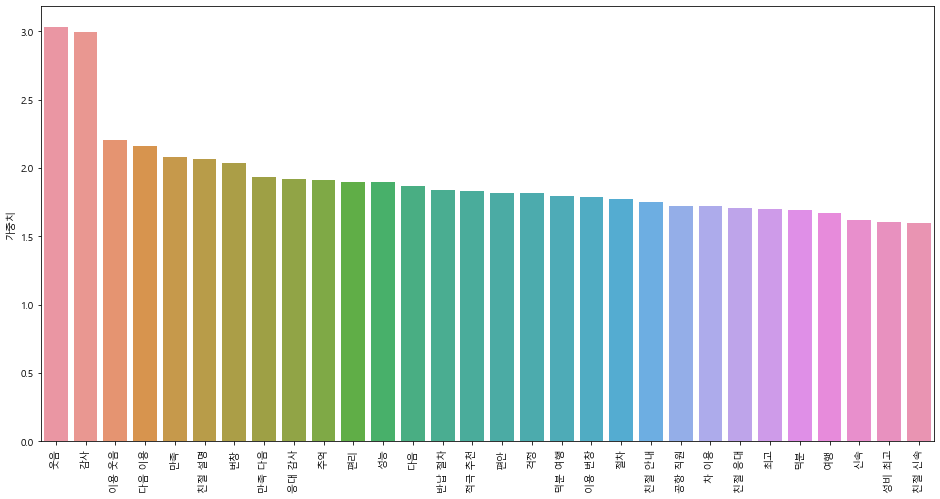

In [8]:
pos_word = word_sent.loc[word_sent.가중치 >=0, :].sort_values('가중치', ascending=False)[:30]

plt.figure(figsize = (16,8)) 
sns.barplot(x = list(pos_word.토큰), y = '가중치', data = pos_word)
plt.xticks(rotation =90)
plt.show()

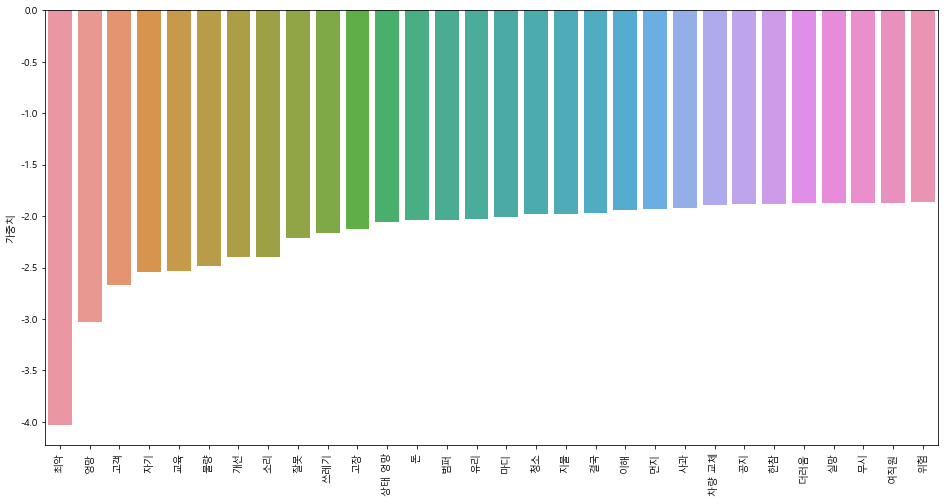

In [9]:
neg_word = word_sent.loc[word_sent.가중치 <=0, :].sort_values('가중치', ascending=True)[:30]

plt.figure(figsize = (16,8)) 
sns.barplot(x = list(neg_word.토큰), y = '가중치', data = neg_word)
plt.xticks(rotation =90)
plt.show()

##  5. 주제 분석

- (1) LSA

In [230]:
from sklearn.decomposition import TruncatedSVD 

from matplotlib import pyplot
svd = TruncatedSVD(n_components=72, random_state=2000)  # 초기화

svd.fit(word_frequency_tfid )

import numpy as np
nrow, ncol = word_frequency_tfid.shape

def resample(a):
    return np.random.choice(a, size=nrow)

np.random.seed(2000)
d = np.apply_along_axis(resample, 0, word_frequency_tfid.A)

svd2 = TruncatedSVD(n_components=72,random_state=2000)
svd2.fit(d)

TruncatedSVD(n_components=72, random_state=2000)

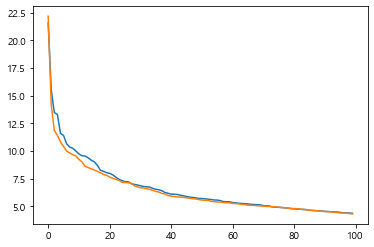

In [224]:
plt.figure()
pyplot.plot(svd.singular_values_)
pyplot.plot(svd2.singular_values_)
plt.show()

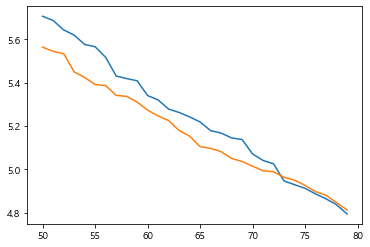

In [229]:
plt.figure()
pyplot.plot(range(50,80), svd.singular_values_[50:80])
pyplot.plot(range(50,80),svd2.singular_values_[50:80])

plt.show()

In [360]:
from factor_analyzer.rotator import Rotator
from sklearn.decomposition import NMF

def processing(text):
    
    print("----------(LSA 적용)----------")
    word_process = words.index(text)
    svd.components_[:, word_process]
    
    word_max_index = svd.components_[:, word_process].argmax()
    print("양의 방향으로 영향력이 제일 관련있는 인덱스 번호:", word_max_index)
    word_min_index = svd.components_[:, word_process].argmin()
    print("음의 방향으로 영향력이 제일 관련있는 인덱스 번호:", word_min_index)

    process = pd.DataFrame({'word': words, 'loading': svd.components_[word_max_index]})
    print("양의 방향으로 관련 있는 단어들 목록10가지")
    display(process.sort_values('loading').tail(10))

    process = pd.DataFrame({'word': words, 'loading': svd.components_[word_min_index]})
    print("음의 방향으로 관련 있는 단어들 목록10가지:")
    display(process.sort_values('loading').head(10))
    
    print("----------(LSA 회전 적용)----------")
    
    rotator = Rotator()
    rot = rotator.fit_transform(svd.components_.T)
    loading = rot.T 
    
    rot_max_index  = loading[:, word_process].argmax()
    print("회전 적용시, 양의 방향으로 영향력이 제일 관련있는 인덱스 번호:", rot_max_index)
    rot_process = pd.DataFrame({'word': words, 'loading': loading[rot_max_index]})
    
    print("회전 적용 시, 양의 방향으로 관련 있는 단어들 목록 10가지:")
    display(rot_process.sort_values('loading').tail(10))
    
    print("회전 적용 시, 음의 방향으로 관련 있는 단어들 목록10가지:")
    display(rot_process.sort_values('loading').head(10))
    
    print("----------(NMF 적용)----------")
    nmf = NMF(n_components=72, random_state=2000)
    doc_topics = nmf.fit_transform(word_frequency_tfid)
    
    nmf_loading = nmf.components_
    
    nmf_max_index = nmf_loading[:, word_process].argmax()
    print("NMF시 영향력이 제일 관련있는 인덱스 번호:", nmf_max_index)
    
    nmf_result = pd.DataFrame({'word': words, 'loading': nmf_loading[nmf_max_index]})
    print("NMF시 관련 있는 단어들 목록10가지:")
    display(nmf_result.sort_values('loading').tail(10))  
    
    from matplotlib import pyplot
    pyplot.figure(figsize= (16,8))
    
    pyplot.subplot(131)
    pyplot.plot(svd.components_[:, word_process])
    pyplot.title("LSA 해당 주제 관련도")
    
    pyplot.subplot(132)
    pyplot.plot(loading[:, word_process])
    pyplot.title("LSA[회전] 해당 주제 관련도")
    
    pyplot.subplot(133)
    pyplot.plot(nmf_loading[:, word_process])
    pyplot.title("LMF 해당 주제 관련도")
    plt.show()

주제 분석할 키워드를 입력하세요': 기름
----------(LSA 적용)----------
양의 방향으로 영향력이 제일 관련있는 인덱스 번호: 60
양의 방향으로 영향력이 제일 관련있는 인덱스 번호: 61
양의 방향으로 관련 있는 단어들 목록10가지


,word,loading
579,요금,0.083591
337,부족,0.085338
4,가격 이용,0.085565
725,주유,0.100563
859,추가,0.110110
600,유리,0.118824
102,기름 값,0.137083
24,값,0.150932
986,환불,0.160427
101,기름,0.520690


음의 방향으로 관련 있는 단어들 목록10가지:


,word,loading
603,응대,-0.251627
840,처음,-0.238453
101,기름,-0.222686
897,친절 이용,-0.169676
595,위치,-0.135832
176,대비,-0.130440
896,친절 응대,-0.124579
1,가격 대비,-0.115258
557,예약,-0.111014
204,렌터카,-0.104185


----------(LSA 회전 적용)----------
회전 적용시, 양의 방향으로 영향력이 제일 관련있는 인덱스 번호: 60
회전 적용 시, 양의 방향으로 관련 있는 단어들 목록 10가지:


,word,loading
284,반납,0.099393
579,요금,0.111613
549,연료,0.121973
337,부족,0.127905
859,추가,0.137999
725,주유,0.147573
102,기름 값,0.200059
24,값,0.219302
986,환불,0.231005
101,기름,0.762048


회전 적용 시, 음의 방향으로 관련 있는 단어들 목록10가지:


,word,loading
633,이용 웃음,-0.091410
32,걱정,-0.071429
574,외관,-0.059149
314,버스,-0.058112
990,후기,-0.057456
373,사장,-0.053921
697,전화,-0.048206
566,옵션,-0.037427
374,사장 친절,-0.037291
4,가격 이용,-0.036372


----------(NMF 적용)----------


C:\Users\gby1349\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF시 영향력이 제일 관련있는 인덱스 번호: 68
NMF시 관련 있는 단어들 목록10가지:


,word,loading
404,선택,0.123865
986,환불,0.192157
102,기름 값,0.267280
788,차 처음,0.269711
115,기차 처음,0.273322
24,값,0.281623
221,렌터카 처음,0.288282
841,처음 이용,0.615345
101,기름,0.993476
840,처음,2.400636


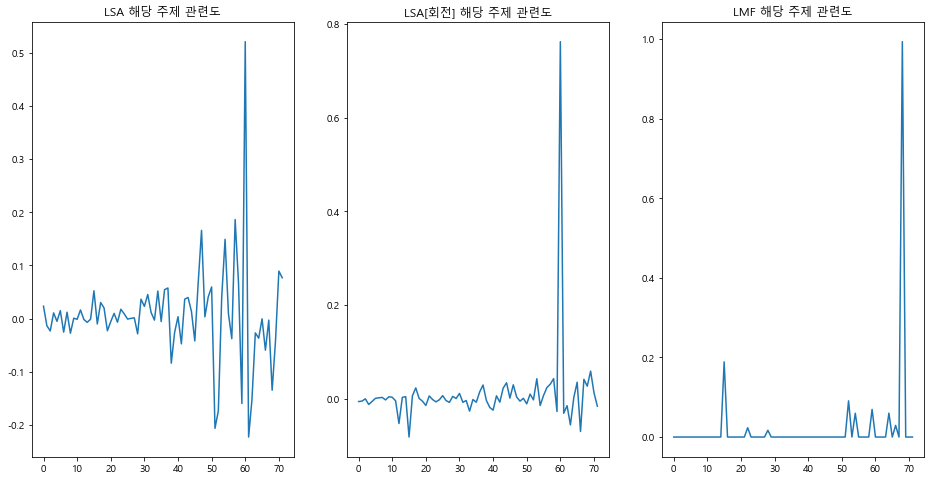

In [363]:
search = input("주제 분석할 키워드를 입력하세요': ")

processing(search)

In [306]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(svd.components_, words)

Topic 1: [('이용', 0.47897), ('친절', 0.34926), ('차량', 0.29818), ('차', 0.26167), ('직원', 0.21097)]
Topic 2: [('이용', 0.76853), ('다음 이용', 0.18472), ('다음', 0.16988), ('이용 웃음', 0.04743), ('가격 이용', 0.04348)]
Topic 3: [('친절', 0.60507), ('직원 친절', 0.33598), ('직원', 0.30626), ('이용', 0.09979), ('친절 이용', 0.07261)]
Topic 4: [('차', 0.70759), ('친절 차', 0.1134), ('전기', 0.09163), ('전기 차', 0.08319), ('충전', 0.06629)]
Topic 5: [('여행', 0.74332), ('웃음', 0.26212), ('감사', 0.22333), ('덕분', 0.22007), ('덕분 여행', 0.17085)]
Topic 6: [('공항', 0.65488), ('렌터카', 0.23644), ('반납', 0.16771), ('시간', 0.16534), ('셔틀', 0.16141)]
Topic 7: [('다음', 0.3786), ('다음 이용', 0.37847), ('공항', 0.37127), ('웃음', 0.34462), ('만족', 0.1535)]
Topic 8: [('만족', 0.56189), ('가격', 0.37183), ('렌터카', 0.25273), ('사용', 0.12857), ('렌트', 0.11044)]
Topic 9: [('가격', 0.38796), ('만족', 0.36143), ('공항', 0.21933), ('이용', 0.18598), ('가격 이용', 0.11732)]
Topic 10: [('웃음', 0.73643), ('사용', 0.22887), ('이용 웃음', 0.17917), ('감사', 0.14104), ('친절 웃음', 0.08821)]
Topic 11: [('친절', 

#### (2) LDA

In [176]:
import re 

def tokenizer(text):
    words = []
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in'NY': 
            if token not in stop_word_list:
                words.append(token)            
    return words

In [177]:
docs = []
for text in data.Review:
    doc = tokenizer(text)
    docs.append(doc)
    
from gensim.corpora.dictionary import Dictionary
dic = Dictionary(docs)
dic.filter_extremes(no_below=5, no_above=0.9)

corpus = []
for doc in docs:
    bow = dic.doc2bow(doc) 
    corpus.append(bow)

= 차원 결정하기 위한 응집도 및 다양성 계산

In [179]:
from gensim.models.ldamodel import LdaModel
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

old_coherence = 0.0
varies = 0.0
print("최초 응집도: ", old_coherence)
coherence_list = []
varies_list = []

for i in range(30, 201, 1):
    
    train_corpus, valid_corpus = train_test_split(corpus, test_size=0.2, random_state=2000)
    model = LdaModel(corpus=train_corpus, id2word= dic, num_topics=i, random_state=2000) 
    
    coh = CoherenceModel(model=model, corpus=corpus, texts=docs, dictionary=dic, coherence='c_v')
    coherence = coh.get_coherence() 
    
    topn = 30
    top_words = set()
    for topic in range(model.num_topics):
        for word, prob in model.show_topic(topic, topn=topn):
            top_words.add(word)
            
    varies = len(top_words) / (topn * i)
    
    coherence_list.append(coherence)
    varies_list.append(varies)
    
    if coherence >= old_coherence + 0.005: 
        print('주제수:', i, '응집도 향상:', coherence, '다양도:', varies)
        old_coherence = coherence
    else: 
        print('주제수:', i, '응집도 향상X:', coherence, '다양도:', varies)
        continue

최초 응집도:  0.0
주제수: 30 응집도 향상: 0.49308377852498736 다양도: 0.41444444444444445
주제수: 31 응집도 향상: 0.51626915351622 다양도: 0.4064516129032258
주제수: 32 응집도 향상X: 0.5127158425529605 다양도: 0.40625
주제수: 33 응집도 향상X: 0.5073671712719794 다양도: 0.41818181818181815
주제수: 34 응집도 향상X: 0.4788584121083896 다양도: 0.4107843137254902
주제수: 35 응집도 향상X: 0.48316152056683453 다양도: 0.41619047619047617
주제수: 36 응집도 향상X: 0.4887034357724023 다양도: 0.4083333333333333
주제수: 37 응집도 향상X: 0.4915308020532673 다양도: 0.4189189189189189
주제수: 38 응집도 향상X: 0.49817863216350117 다양도: 0.39824561403508774
주제수: 39 응집도 향상X: 0.49336952785229726 다양도: 0.41794871794871796
주제수: 40 응집도 향상X: 0.48849123823678486 다양도: 0.4083333333333333
주제수: 41 응집도 향상X: 0.4918157968365051 다양도: 0.4032520325203252
주제수: 42 응집도 향상X: 0.4963326638679609 다양도: 0.4007936507936508
주제수: 43 응집도 향상X: 0.4830116156613242 다양도: 0.3883720930232558
주제수: 44 응집도 향상X: 0.49180395704059093 다양도: 0.4037878787878788
주제수: 45 응집도 향상X: 0.4609015566057586 다양도: 0.4066666666666667
주제수: 46 응집도 향상X: 0.493035955037

주제수: 164 응집도 향상X: 0.4783348266827108 다양도: 0.24674796747967478
주제수: 165 응집도 향상X: 0.4603374405272937 다양도: 0.2496969696969697
주제수: 166 응집도 향상X: 0.4642977919449601 다양도: 0.2520080321285141
주제수: 167 응집도 향상X: 0.4694584274789311 다양도: 0.24311377245508983
주제수: 168 응집도 향상X: 0.4680497494548999 다양도: 0.24107142857142858
주제수: 169 응집도 향상X: 0.47131702736390935 다양도: 0.24142011834319527
주제수: 170 응집도 향상X: 0.4793977217104217 다양도: 0.24411764705882352
주제수: 171 응집도 향상X: 0.4632698385295141 다양도: 0.23996101364522418
주제수: 172 응집도 향상X: 0.46226525052662126 다양도: 0.23856589147286822
주제수: 173 응집도 향상X: 0.47846749171068226 다양도: 0.24335260115606935
주제수: 174 응집도 향상X: 0.46881832643564747 다양도: 0.2367816091954023
주제수: 175 응집도 향상X: 0.47417951604412784 다양도: 0.23466666666666666
주제수: 176 응집도 향상X: 0.46281434826201906 다양도: 0.24034090909090908
주제수: 177 응집도 향상X: 0.470746611012456 다양도: 0.239924670433145
주제수: 178 응집도 향상X: 0.47390194451345286 다양도: 0.23389513108614232
주제수: 179 응집도 향상X: 0.47922554651970095 다양도: 0.23109869646182496
주제수: 1

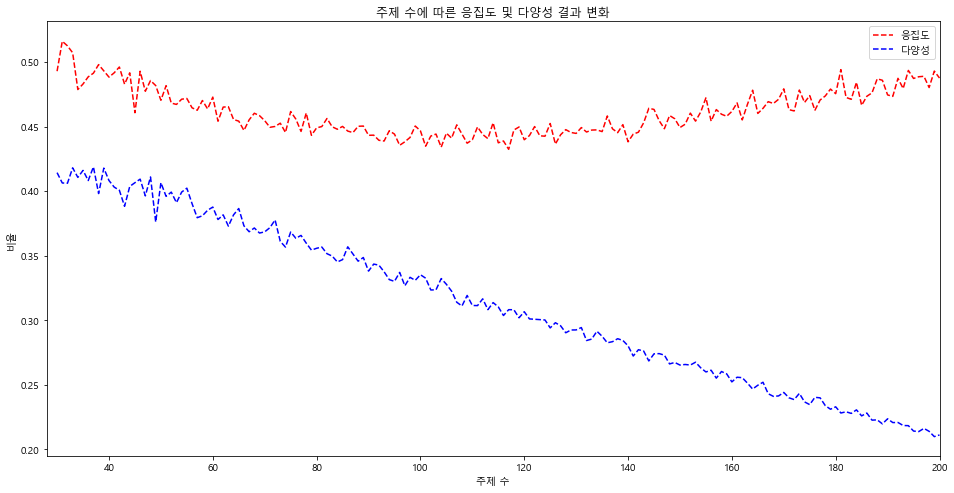

In [205]:
count = range(30,201,1)

plt.figure(figsize = (16,8))

plt.plot(count, coherence_list, "r--", label = "응집도")
plt.plot(count, varies_list, "b--", label = "다양성")
plt.title("주제 수에 따른 응집도 및 다양성 결과 변화")
plt.legend()
plt.xlabel("주제 수")
plt.ylabel('비율')
plt.xlim(28,200)
plt.show()

- 차원 수: 31차원 모델 학습

In [199]:
from gensim.models.ldamodel import LdaModel

from sklearn.model_selection import train_test_split
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.2, random_state=2000)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

model = LdaModel(corpus=train_corpus, id2word= dic, num_topics=31, random_state=2000)  

In [200]:
import numpy

old_loss = -numpy.inf
loss = model.log_perplexity(valid_corpus) 
print("최초 성능: ", loss)

while loss > old_loss + 0.01:
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus) 
    print('향상된 성능: ', loss)

최초 성능:  -7.819900301810655
향상된 성능:  -7.699176325934309
향상된 성능:  -7.653812524033124
향상된 성능:  -7.633328143876887
향상된 성능:  -7.625624589776226


- 모델 저장

In [201]:
model.save('lda-model')

model = LdaModel.load('lda-model')

- 각 토픽 별 상위 단어 5개 추출

In [207]:
for i in range(31):
    print("Topic %d:" % (i+1), model.show_topic(i)[0:5])

Topic 1: [('시간', 0.06298188), ('차량', 0.031147396), ('반납', 0.025413062), ('전화', 0.020758491), ('렌터카', 0.017806742)]
Topic 2: [('이용', 0.3724127), ('다음', 0.15534487), ('렌터카', 0.0811866), ('친절', 0.051539324), ('차', 0.0384127)]
Topic 3: [('렌터카', 0.13137048), ('셔틀버스', 0.102592655), ('버스', 0.06261548), ('공항', 0.06128769), ('친절', 0.050957024)]
Topic 4: [('업체', 0.10899787), ('말', 0.07218314), ('예약', 0.07049825), ('렌터카', 0.042856634), ('기분', 0.037698932)]
Topic 5: [('대여', 0.11046961), ('차', 0.065479934), ('시트', 0.048441757), ('카', 0.04537528), ('업체', 0.03760242)]
Topic 6: [('소리', 0.04763527), ('문제', 0.04571187), ('차', 0.045511425), ('인도', 0.04110696), ('값', 0.038713023)]
Topic 7: [('유리', 0.110802054), ('운전', 0.08538423), ('옵션', 0.06932043), ('제한', 0.041634887), ('사이드', 0.031813905)]
Topic 8: [('보험', 0.08929788), ('사고', 0.07659634), ('프리미엄', 0.024700345), ('예약', 0.021829048), ('차', 0.021798944)]
Topic 9: [('사용', 0.19074081), ('추천', 0.09804627), ('가족', 0.059933074), ('연비', 0.036638066), ('신형', 0.0

- 시각화

In [168]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook() 

p = pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=False)  

pyLDAvis.display(p)

- 문서 별 토픽 분포 보기

In [210]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(doc): 
            if j == 0:  
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
                
    return(topic_table)

In [211]:
topictable = make_topictable_per_doc(model, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,20.0,0.4071,"[(1, 0.2959677), (20, 0.40710533), (23, 0.0973..."
1,1,24.0,0.2466,"[(0, 0.087013654), (1, 0.067372486), (7, 0.048..."
2,2,21.0,0.5161,"[(0, 0.016129052), (1, 0.016129052), (2, 0.016..."
3,3,0.0,0.3725,"[(0, 0.37247273), (4, 0.06699493), (7, 0.12331..."
4,4,11.0,0.5161,"[(0, 0.016129054), (1, 0.016129054), (2, 0.016..."
5,5,0.0,0.2424,"[(0, 0.2424073), (1, 0.118821144), (4, 0.16513..."
6,6,1.0,0.4014,"[(1, 0.40142933), (21, 0.36468244)]"
7,7,30.0,0.3443,"[(0, 0.010752794), (1, 0.010752794), (2, 0.010..."
8,8,19.0,0.3332,"[(18, 0.14062257), (19, 0.33323324), (23, 0.09..."
9,9,26.0,0.5161,"[(0, 0.016129047), (1, 0.016129047), (2, 0.016..."
